In [1]:
import numpy as np
import jax
import jax.numpy as jnp
import jax.scipy as jsc

import matplotlib.pyplot as plt
import astropy.constants as c
from astropy.units import Quantity
import astropy.units as u

from gala.potential import PlummerPotential
from gala.units import galactic

In [5]:
pot = PlummerPotential(m=1E11*u.Msun, b=1*u.kpc, units=galactic)

In [14]:
_g = c.G.to(u.kpc**3 / u.Gyr**2 / u.Msun).value

alpha = .16
r2 = 20
rho2 = (1e-3 * u.Msun / u.pc**3).to(u.Msun / u.kpc**3).value

def einastoDensity(q, alpha, r2, rho2):
    
    jnp.exp((-2/alpha) * ()

def einastoPotential(q, alpha, r2, rho2):
    rc = 0. # cusped form
    rtilde_s = r2 # cusped form
    rhotilde_s = rho2

    def lowerIncompleteGammaFunc(a, x, tilde=False):
        base = jsc.special.gammainc(a, x) * jsc.special.gamma(a)
        if tilde:
            return base * (alpha * rtilde_s**alpha / 2)**a
        else: 
            return base

    def upperIncompleteGammaFunc(a, x, tilde=False):
        base = jsc.special.gammaincc(a, x) * jsc.special.gamma(a)
        if tilde:
            return base * (alpha * rtilde_s**alpha / 2)**a
        else: 
            return base
    
    r = jnp.sqrt(q[0]**2 + q[1]**2 + q[2]**2)
    _sr =  2 * (r + rc)**alpha / (alpha * rtilde_s**alpha)

    # jsc.special.gammainc(_sr) * jsc.special.gamma(3/alpha)
    tmp1 = 4*np.pi*_g * rhotilde_s * jnp.exp(2/alpha) / alpha
    tmp2 = (1/r) * lowerIncompleteGammaFunc(3/alpha, _sr, tilde=True)
    tmp3 = 0 # propto rc**2, which is 0
    tmp4 = 0 # propto rc, which is 0
    tmp5 = upperIncompleteGammaFunc(2/alpha, _sr, tilde=True)
    tmp6 = 0 # propto rc, which is 0

    return tmp1 * (tmp2 + tmp5)

In [15]:
hess = jax.hessian(einastoPotential, argnums=0)

In [16]:
r = jnp.logspace(-3, 3, 100)

In [17]:

gh = pot.hessian(jnp.array([r, jnp.zeros_like(r), jnp.zeros_like(r)])).to(u.Gyr**(-2)).value.T
mh = jnp.array([hess(jnp.array([r_i, 0, 0]), alpha, r2, rho2) for r_i in r])

g_tt = jnp.array([-(1/3)*jnp.trace(gh_i) * jnp.identity(3) + gh_i for gh_i in gh])
m_tt = jnp.array([-(1/3)*jnp.trace(mh_i) * jnp.identity(3) + mh_i for mh_i in mh])

In [18]:
g_lam = np.max(np.abs(np.linalg.eig(g_tt)[0]), axis=1)
m_lam = np.max(np.abs(np.linalg.eig(m_tt)[0]), axis=1)

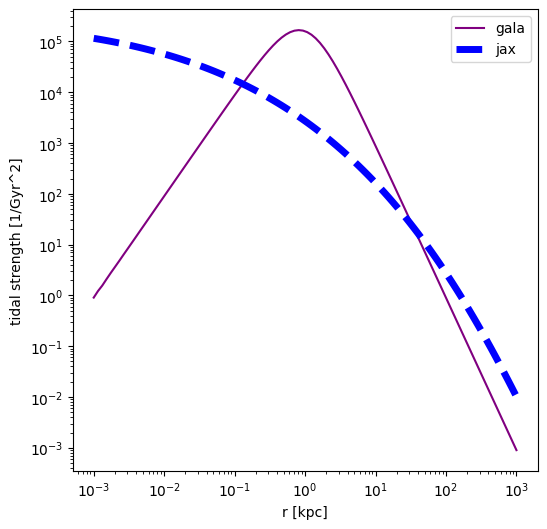

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.loglog(r, g_lam, c='purple', label='gala')
ax.loglog(r, m_lam, c='blue', ls='--', lw=5, label='jax')
ax.set_xlabel('r [kpc]')
ax.set_ylabel('tidal strength [1/Gyr^2]')
ax.legend()
plt.show()

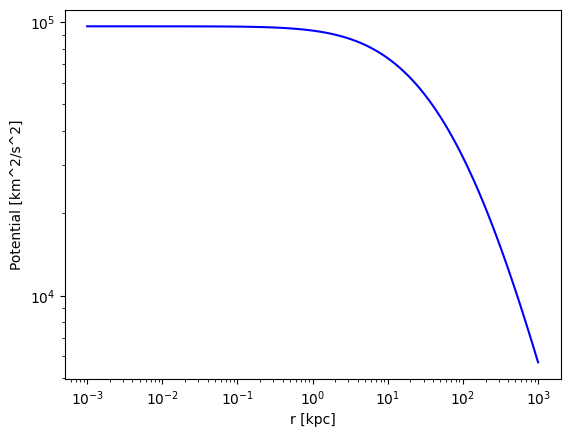

In [24]:
fig, ax = plt.subplots()

conv_factor = (u.kpc**2 / u.Gyr**2).to(u.km**2 / u.s**2)
ax.loglog(r, einastoPotential(jnp.array([r, jnp.zeros_like(r), jnp.zeros_like(r)]), alpha, r2, rho2) * conv_factor, c='blue', label='jax')
ax.set_xlabel('r [kpc]')
ax.set_ylabel('Potential [km^2/s^2]')
plt.show()

In [33]:
def laplacian(q):
    # get diagonal elements of hessian
    hess = jax.hessian(einastoPotential, argnums=0)
    r = jnp.sqrt(q[0]**2 + q[1]**2 + q[2]**2)
    hess_diag = jnp.array([jnp.diag(hess(jnp.array([r_i, 0, 0]), alpha, r2, rho2)) for r_i  ])
    return 

In [34]:
laplacian(jnp.array([1., 0., 0.]), alpha, r2, rho2) 

TypeError: Gradient only defined for scalar-output functions. Output had shape: (3,).